In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

In [2]:
df_students_take_tests = pd.read_csv("../tables_creation/final_tables/students_take_tests.csv")
df_students = pd.read_csv("../tables_creation/final_tables/students.csv")

C:\Users\Admin\AppData\Local\Temp\ipykernel_14000\3529048147.py:2: DtypeWarning: Columns (3,4) have mixed types. Specify dtype option on import or set low_memory=False.
  df_students = pd.read_csv("../tables_creation/final_tables/students.csv")


In [3]:
df_students_take_tests = df_students_take_tests.loc[df_students_take_tests['test_subject'] == 'ukrtest']

In [4]:
df_merged = df_students_take_tests.merge(df_students, how='left', on='outid')
df_merged

,outid,year_x,score100,score12,score,test_status,test_subject,test_type,KOATUU_2020_x,EDRPOU_test_center,birth,sextypename,classprofilename,classlangname,KOATUU_2020_y,EDRPOU_school,year_y
0,00000AC7-CDDE-4C77-B979-8B0351AF1305,2017,161.0,9.0,NaN,Accepted,ukrtest,EIE,5.110137e+09,20995060.0,2000,Female,Інший,Ukrainian,5110136900,23864660.0,2017
1,00000dce-36de-4d58-9dc2-7ffc824f597a,2021,NaN,NaN,NaN,Absent,ukrtest,EIE,1.810700e+09,22061344.0,2004,Male,Foreign philology,Ukrainian,1822380901,22056432.0,2021
2,00001a8d-fff5-4c7c-bea2-b0157f7c5655,2021,128.0,6.0,31.0,Accepted,ukrtest,EIE,7.110136e+09,25922746.0,2002,Male,Skilled worker,Ukrainian,7110136700,5538052.0,2021
3,0000268f-9fdd-49b2-9ee2-422778c9c4f1,2016,160.0,8.0,NaN,Accepted,ukrtest,EIE,6.310137e+09,24486622.0,1998,Male,NaN,NaN,6310136300,23320374.0,2016
4,0000324e-f525-49c4-a963-8df0cc02d6d5,2018,166.0,9.0,69.0,Accepted,ukrtest,EIE,4.611200e+09,34387362.0,2001,Male,Mathematics,Ukrainian,4611200000,20773804.0,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2457043,ffffeb30-6810-4054-b0b3-04c13a450c85,2022,142.0,NaN,14.0,Accepted,ukrtest,NMT,1.811000e+09,NaN,2005,Female,NaN,NaN,1824087401,727989.0,2022
2457044,ffffeeb2-7258-4465-bca3-88dd19902340,2019,169.0,10.0,70.0,Accepted,ukrtest,EIE,1.210138e+09,26508368.0,2002,Male,Economics,Russian,1210136600,26509416.0,2019
2457045,fffff6db-6fcc-481f-aa92-49906c0ad1c8,2021,NaN,NaN,NaN,Absent,ukrtest,EIE,4.610138e+09,2545659.0,2003,Female,Skilled worker,Ukrainian,4610136300,33195557.0,2021
2457046,fffff7dc-0331-41bb-aa5e-e51024ac605e,2021,128.0,NaN,31.0,Accepted,ukrtest,EIE,7.101000e+08,23253324.0,2004,Female,Junior specialist,Ukrainian,710100000,1566465.0,2021


[Text(0.5, 1.0, 'Results of Ukrainian language test by year and gender')]

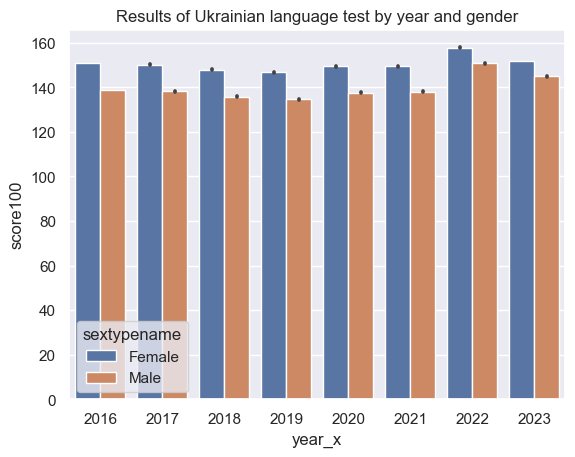

In [20]:
sns.barplot(df_merged.loc[df_merged['test_status'] == 'Accepted'], x="year_x", y="score100", estimator='mean', hue="sextypename").set(title='Results of Ukrainian language test by year and gender')

Note, that relative scores in 200-points scale are used for the plot, and only results of students who reached the threshold are considered. As each year has different system of scaling into 200-points scale, this plot can only be used for comparison of the difference between results by gender during the years.

In [15]:
df_merged_came_to_test = df_merged.loc[df_merged['test_status'].isin(['Accepted', 'Failed'])]
df_failure_rate = df_merged_came_to_test.groupby(["sextypename", "year_x", "test_status"]).test_status.count().unstack().fillna(0)
df_failure_rate['Failure_rate'] = df_failure_rate['Failed'] / (df_failure_rate['Accepted'] + df_failure_rate['Failed'])
df_failure_rate.reset_index(inplace=True)

[Text(0.5, 1.0, 'Failure rate of Ukrainian language test by year and gender')]

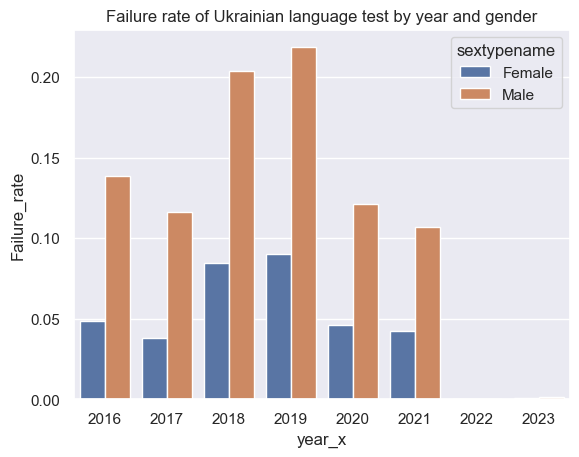

In [17]:
sns.barplot(df_failure_rate, x="year_x", y="Failure_rate", hue="sextypename").set(title='Failure rate of Ukrainian language test by year and gender')

Only results of students who came to the test are considered.